# **Explore MRI Data and Labels**

Notebook ini berisikan eksplorasi dataset MRI


---


### **Sekilas terkait Dataset:**
1. Dataset dapat didownload disini https://ida.loni.usc.edu/
2. Dataset ada 4 class yaitu `AD` `EMCI` `LMCI` `CN`
3. Dataset berformat nii.gz dengan ukuran 256 x 256 x 175 voxels


### Import packages

Impor beberapa package (`numpy`, `matplotlib`, dan `seaborn`) serta beberapa pustaka baru untuk membaca (`nibabel`) dan memvisualisasikan data (`itk`, `itkwidgets`, `ipywidgets`).

In [16]:
import numpy as np
import nibabel as nib
import pandas as pd
import os
from PIL import Image
from ipywidgets import interact
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

## 1. Explore the Data

### 1.1 Loading Images of the Brain

In [4]:
folder_path = r"D:\Users\RESA\Coding\Data"

# Mendapatkan daftar semua file dalam folder
file_list = []
for root, dirs, files in os.walk(folder_path):
    for file in files:
        file_path = os.path.join(root, file)
        file_list.append(file_path)

# Memuat setiap file gambar dalam daftar
for file_path in file_list:
    try:
        image_obj = nib.load(file_path)
        print(f'Type of the image {type(image_obj)}')
    except nib.filebasedimages.ImageFileError:
        print(f'Error loading image: {file_path}')


Type of the image <class 'nibabel.nifti1.Nifti1Image'>
Type of the image <class 'nibabel.nifti1.Nifti1Image'>
Type of the image <class 'nibabel.nifti1.Nifti1Image'>
Type of the image <class 'nibabel.nifti1.Nifti1Image'>
Type of the image <class 'nibabel.nifti1.Nifti1Image'>
Type of the image <class 'nibabel.nifti1.Nifti1Image'>
Type of the image <class 'nibabel.nifti1.Nifti1Image'>
Type of the image <class 'nibabel.nifti1.Nifti1Image'>
Type of the image <class 'nibabel.nifti1.Nifti1Image'>
Type of the image <class 'nibabel.nifti1.Nifti1Image'>
Type of the image <class 'nibabel.nifti1.Nifti1Image'>
Type of the image <class 'nibabel.nifti1.Nifti1Image'>
Type of the image <class 'nibabel.nifti1.Nifti1Image'>
Type of the image <class 'nibabel.nifti1.Nifti1Image'>
Type of the image <class 'nibabel.nifti1.Nifti1Image'>
Type of the image <class 'nibabel.nifti1.Nifti1Image'>
Type of the image <class 'nibabel.nifti1.Nifti1Image'>
Type of the image <class 'nibabel.nifti1.Nifti1Image'>
Type of th

Jumlah data

In [8]:
class_names = ['AD', 'CN', 'EMCI', 'LMCI']

# Menghitung jumlah data untuk setiap kelas
class_counts = {class_name: len(os.listdir(os.path.join(folder_path, class_name))) for class_name in class_names}
print(f"Jumlah kelas: {len(class_names)}")
print(f"Jumlah data keseluruhan: {sum(class_counts.values())}")

Jumlah kelas: 4
Jumlah data keseluruhan: 800


In [11]:
df = pd.DataFrame([{'Kelas': folder_name, 'Jumlah data': len(os.listdir(os.path.join(folder_path, folder_name)))} for folder_name in class_names])

# Menampilkan DataFrame
print(df)

  Kelas  Jumlah data
0    AD          200
1    CN          200
2  EMCI          200
3  LMCI          200


Visualisasi bar chart

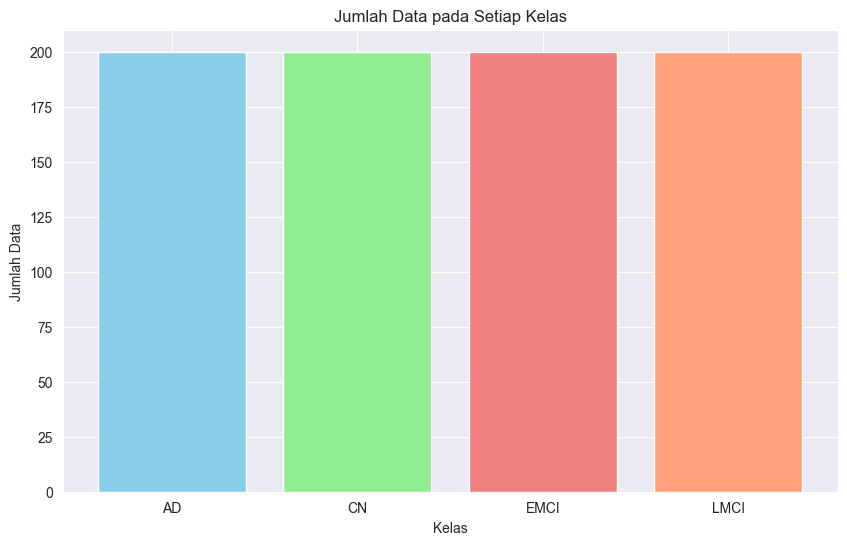

In [13]:
plt.figure(figsize=(10, 6))
plt.bar(df['Kelas'], df['Jumlah data'], color=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon'])
plt.xlabel('Kelas')
plt.ylabel('Jumlah Data')
plt.title('Jumlah Data pada Setiap Kelas')
plt.show()

In [14]:
data = [{'path_gambar': os.path.join(folder_path, class_name, file_name),
         'kelas': class_name,
         'nama_gambar': os.path.splitext(file_name)[0],
         'ekstensi': os.path.splitext(file_name)[1]}
        for class_name in os.listdir(folder_path)
        for file_name in os.listdir(os.path.join(folder_path, class_name))]

# Membuat DataFrame dari list
df = pd.DataFrame(data)

# Menampilkan DataFrame
print(df)

                                           path_gambar kelas  \
0     D:\Users\RESA\Coding\Data\AD\AD_001_brain.nii.gz    AD   
1     D:\Users\RESA\Coding\Data\AD\AD_002_brain.nii.gz    AD   
2     D:\Users\RESA\Coding\Data\AD\AD_003_brain.nii.gz    AD   
3     D:\Users\RESA\Coding\Data\AD\AD_004_brain.nii.gz    AD   
4     D:\Users\RESA\Coding\Data\AD\AD_005_brain.nii.gz    AD   
..                                                 ...   ...   
795  D:\Users\RESA\Coding\Data\LMCI\LMCI_196_brain....  LMCI   
796  D:\Users\RESA\Coding\Data\LMCI\LMCI_197_brain....  LMCI   
797  D:\Users\RESA\Coding\Data\LMCI\LMCI_198_brain....  LMCI   
798  D:\Users\RESA\Coding\Data\LMCI\LMCI_199_brain....  LMCI   
799  D:\Users\RESA\Coding\Data\LMCI\LMCI_200_brain....  LMCI   

            nama_gambar ekstensi  
0      AD_001_brain.nii      .gz  
1      AD_002_brain.nii      .gz  
2      AD_003_brain.nii      .gz  
3      AD_004_brain.nii      .gz  
4      AD_005_brain.nii      .gz  
..                  .

In [15]:
format_ekstensi = df['ekstensi'].unique()

# Menampilkan hasil
print("Format unik dalam kolom 'ekstensi':")
print(format_ekstensi)

Format unik dalam kolom 'ekstensi':
['.gz']


### 1.2 Extract the Data as a Numpy Array

In [20]:
# Extract data jadi numpy ndarray
image_data = image_obj.get_fdata()
type(image_data)

numpy.ndarray

In [23]:
# Get the citra shape dan print it out
height, width, depth = image_data.shape
print(f"The image object has the following dimensions: height: {height}, width:{width}, depth:{depth}")

The image object has the following dimensions: height: 170, width:256, depth:256


### 1.3 Visualize the Data

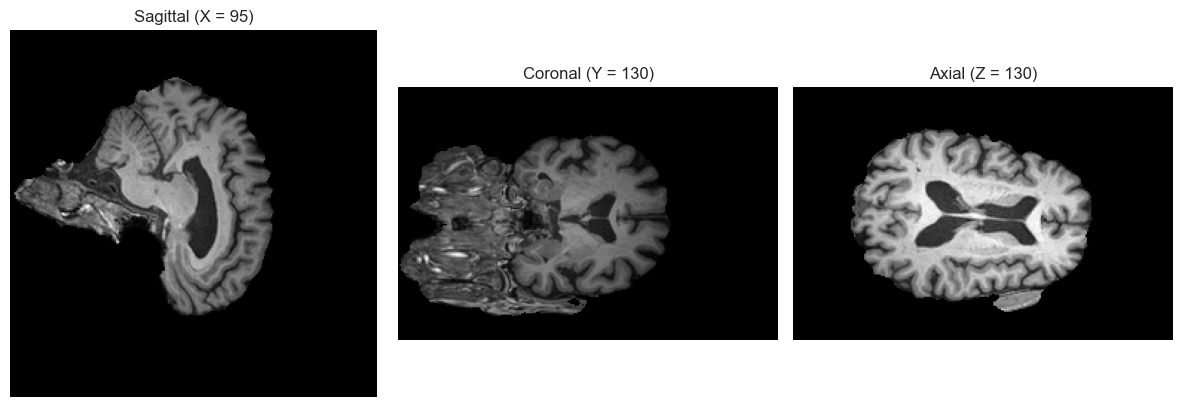

In [26]:
# Define koordinatnya
x_coord = 95
y_coord = 130
z_coord = 130


# Buat a figure dengan subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot the slice pada X-axis (sagittal)
axs[0].imshow(image_data[x_coord, :, :], cmap='gray')
axs[0].set_title(f'Sagittal (X = {x_coord})')
axs[0].axis('off')

# Plot the slice pada Y-axis (coronal)
axs[1].imshow(image_data[:, y_coord, :], cmap='gray')
axs[1].set_title(f'Coronal (Y = {y_coord})')
axs[1].axis('off')

# Plot the slice pada Z-axis (axial)
axs[2].imshow(image_data[:, :, z_coord], cmap='gray')
axs[2].set_title(f'Axial (Z = {z_coord})')
axs[2].axis('off')

plt.tight_layout()
plt.show()

### 1.3.1 Interactive Exploration

In [27]:
def explore_3dimage(layer):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # Sagittal view
    sagittal_slice = image_data[:, :, layer]
    axs[0].imshow(sagittal_slice, cmap='gray')
    axs[0].set_title('Sagittal View', fontsize=15)
    axs[0].axis('off')

    # Axial view
    axial_slice = image_data[layer, :, :]
    axs[1].imshow(axial_slice, cmap='gray')
    axs[1].set_title('Axial View', fontsize=15)
    axs[1].axis('off')

    # Coronal view
    coronal_slice = image_data[:, layer, :]
    axs[2].imshow(coronal_slice, cmap='gray')
    axs[2].set_title('Coronal View', fontsize=15)
    axs[2].axis('off')

    plt.suptitle('Explore Layers of Brain MRI', fontsize=20)
    plt.show()

    return layer

interact(explore_3dimage, layer=(0, image_data.shape[0] - 1));

interactive(children=(IntSlider(value=84, description='layer', max=169), Output()), _dom_classes=('widget-inte…